# Introduction

The project will use OkCupid data.
It will consist of the following steps:
-  Exploratory Data Analysis
-  Cleaning of the data/dataframe
-  Asking the Regression question.
  -  Comparing 2 regression models to solve the question.
-  Asking the classification question.
  - Comparing 2 classification models to solve the question.

# 1 - Exploratory Data Analysis (EDA)

During this stage we will explore the data using tables and plots.
<br> We will use this stage to understand the data that we will be working with.

In [161]:
#importing the packages needed
import pandas as pd
import numpy as np
from math import sqrt
import timeit
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC

In [162]:
#changing options for the Notebook
pd.options.display.max_columns = None
%matplotlib inline

In [163]:
#loading the data into a dataframe
df = pd.read_csv('profiles.csv')
df.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single


In [164]:
df.info()
print('')
#finding the percent of each column that is null -- 40% of diet is null, 59% of offspring is null
#(df.isnull().sum() / df.shape[0]) * 100
((df.count() / df.shape[0]) - 1) * -100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54461 non-null object
essay1         52375 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49099 non-null object
essay6         46175 non-null object
essay7         47496 non-null object
essay8         40732 non-null object
essay9         47344 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

age            -0.000000
body_type       8.834618
diet           40.694959
drinks          4.979482
drugs          23.487806
education      11.056618
essay0          9.149902
essay1         12.629700
essay2         16.077803
essay3         19.143896
essay4         17.577486
essay5         18.094618
essay6         22.972342
essay7         20.768692
essay8         32.052180
essay9         21.022253
ethnicity       9.475194
height          0.005005
income         -0.000000
job            13.675641
last_online    -0.000000
location       -0.000000
offspring      59.321723
orientation    -0.000000
pets           33.231575
religion       33.740366
sex            -0.000000
sign           18.443266
smokes          9.194942
speaks          0.083408
status         -0.000000
dtype: float64

There are 2 columns that contain mising data in 40% or more of the entries. The columns are:

-  Diet (40% is empty)
-  Offsprint (59% is empty)

In [165]:
#let's analyze the income column to see the values that we have
df.income.value_counts().sort_index()

-1          48442
 20000       2952
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 80000       1111
 100000      1621
 150000       631
 250000       149
 500000        48
 1000000      521
Name: income, dtype: int64

The income column also contains 48,442 entries (~81%) with a value of -1. We will assume that is because the data was missing when filling out the profile.
There are 521 people who report an income of 1 Million

In [166]:
#what kind of jobs do people have?
df.job.value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [167]:
#review the height data
df.height.value_counts().sort_index()

1.0        1
3.0        1
4.0        1
6.0        1
8.0        1
9.0        1
26.0       1
36.0      11
37.0       2
42.0       1
43.0       2
47.0       1
48.0       2
49.0       1
50.0       2
51.0       1
52.0       1
53.0       5
54.0       3
55.0       6
56.0       8
57.0      17
58.0      53
59.0     212
60.0     791
61.0    1090
62.0    2244
63.0    2767
64.0    3865
65.0    3794
66.0    4759
67.0    5354
68.0    5449
69.0    5179
70.0    6074
71.0    4826
72.0    5315
73.0    2815
74.0    2547
75.0    1382
76.0     783
77.0     280
78.0     132
79.0      57
80.0      27
81.0      11
82.0      11
83.0      12
84.0       9
85.0       1
86.0       1
87.0       1
88.0       2
89.0       1
90.0       1
91.0       3
92.0       1
93.0       1
94.0       3
95.0      20
Name: height, dtype: int64

Some interesting and likely nonsensical values are appearing in the data. We have people with height of 1 in and 95 inches.
<br> Due to the amount of strange values we will set some criteria regarding the height of people we want. We will only consider people who entered heights between 60 inches (~5 feet) and 80 inches (~6.6 feet)

In [168]:
#let's see how many rows will be removed if we use the above criteria
len(df[(df['height'] < 60) | (df['height'] > 80)])

413

To get a summary of the data we will print the mode of all of the values in the dataset. This will let us get a quick understanding of the values that are entered the most in the profiles.
<br> This will be done for each of the sexes in the dataset.

In [169]:
dfg = df.groupby('sex').apply(lambda x: x.mode())

#unable to cleanly print the modes of each sex and thus will print it out using .loc
print(dfg.loc[('f', 0)])
print('\n')
print(dfg.loc[('m',0)])

age                                                  25
body_type                                       average
diet                                    mostly anything
drinks                                         socially
drugs                                             never
education             graduated from college/university
essay0                                                .
essay1                                     enjoying it.
essay2                                        listening
essay3                                         my smile
essay4                                           ask me
essay5                                           family
essay6                                        my future
essay7                                 out with friends
essay8                                          nothing
essay9                                     you want to.
ethnicity                                         white
height                                          

From the above we are able to find the following summary of the average profile by sex:

<br>The **average female** is around 25 years old, with average body type, graduated from university/college, a height of 64 inches (~5.3 feet),  did not report her income, has a job title of "other", of white ethnicity, with no kids, straight, doesn't smoke, single and speaks english.

<br>The **average male** is around 26 years old, with an athletic body type, graduated from university/college, has a height of 70 inches (~5.8 feet), did not report his income, has a job title of "computer / hardware / software", of white ethnicity, with no kids, straight and speaks english.

In [170]:
pd.crosstab(index=df['sex'], columns='sex')

col_0,sex
sex,
f,24117
m,35829


24,117 (or 40%) of the profiles belong to females.

20000     2952
100000    1621
80000     1111
30000     1048
40000     1005
50000      975
60000      736
70000      707
150000     631
250000     149
500000      48
Name: income, dtype: int64


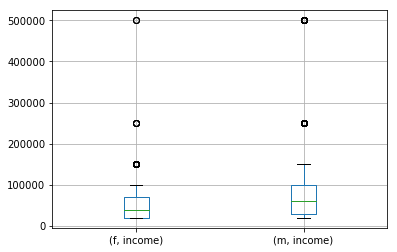

,income
sex,
f,48423.69
m,66950.59


In [171]:
#there are negative income values as well as values of 1 million we will remove them to 
#get a good understanding of income based on sex
inc_pos = df[(df['income'] > 0) & (df['income'] < 1000000)]
print(inc_pos.income.value_counts())

gp = inc_pos[['sex', 'income']].groupby('sex')#.boxplot(subplots=False)
#plt.plot()
#print(gp.describe())
gp.boxplot(subplots = False, return_type='axes')
plt.show()
gp.mean().round(2)

From the above information, we can see that *males make on average 28% more than females*.

On average:

Females make \$48,424
<br>Males make \$66,951

109    1
110    1
Name: age, dtype: int64


18-20     1873
21-30    30017
31-40    17727
41-50     6745
51-60     2618
61-70      964
70+          2
dtype: int64


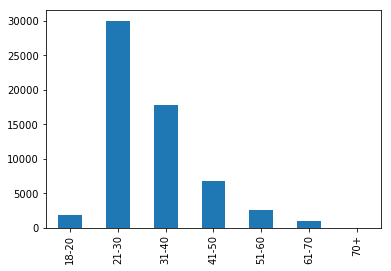

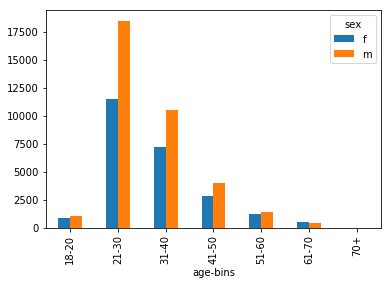

In [172]:
df.age.value_counts(sort=False).sort_index()
print(df[df['age'] > 70].age.value_counts().sort_index())
print('\n')
#we have 2 people who are over 100 years old, seems a bit strange in this dataset
df['age-bins'] = pd.cut(df.age, [17,20,30,40,50,60,70,150], labels=["18-20", "21-30", "31-40", "41-50", "51-60", "61-70", "70+"])

age_cts = df['age-bins'].value_counts()

print(age_cts.sort_index())

#visualizing age group distribution in data
pd.value_counts(df['age-bins']).sort_index().plot.bar()
#plt.show()

#visualizing age groups by sex
df.groupby('age-bins')['sex'].value_counts().unstack().plot.bar()

2 profiles indicate that they are 109 and 110 years old.

From the plots we can see that most (**30,017 or ~50%**) of the profiles indicate an age bettwen 21 and 30.
<br>There are about 3,584 people over 50 years old.

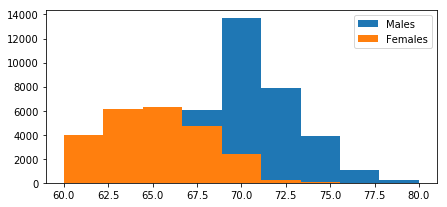

In [173]:
#histogram of height by sex
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(2,1,1)

height_sex = df[['height', 'sex']]
height_sex = height_sex[(df['height'] >= 60) & (df['height'] <= 80)]
males = height_sex[height_sex['sex'] == 'm']['height']
#print(males.value_counts().sort_index)
bins = np.linspace(60,80,num=10)
ax.hist(males,bins,label='Males')

females = height_sex[height_sex['sex'] == 'f']['height']
ax.hist(females, bins,label='Females')

ax.legend()
plt.show()

From the above plot we can see that females reported height is around 62.5 to 65 inches (~ 5.2 feet to 5.4) whereas males show a peak at around 70 inches or (~ 5.8 feet)

In [174]:
#look at the education from the profiles
df.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

1,683 people have reported some sort of education or work in *space camp*

# 2 - Cleaning the DataFrame

Based on the EDA from above we will need to do the following:
-  Remove clients with an age over 100, we will assume those individuals did not want to include their age.
-  Remove income > 1000000, they are outlier that can possibly skew the analysis
-  ONLY include the rows with height >= 60 and <= 80, since these are height that make sense.
-  We will remove the *offspring* column due to the amount of missing data

In [175]:
print('original: %s' %len(df))
#removing clients over age 100 -> removes 2 rows
df_clean = df[df['age'] < 100]
print('Age < 100: %s' %len(df_clean))

#removing income over 1 million -> removes 521 rows
df_clean = df_clean[df_clean['income'] < 1000000]
print('Income < 1 Million: %s' %len(df_clean))

#only include columns with height >= 60 and <= 80 -> removes 401 rows
df_clean = df_clean[(df_clean['height'] >= 60) & (df_clean['height'] <= 80)]
print('height between 60 and 80 inches: %s' %len(df_clean))

#removing the offspring column
print('\n')
print('Original # columns: %s' %len(df_clean.columns))
df_clean = df_clean.drop('offspring', axis=1)
print('Clean # columns: %s' %len(df_clean.columns))

original: 59946
Age < 100: 59944
Income < 1 Million: 59423
height between 60 and 80 inches: 59022


Original # columns: 32
Clean # columns: 31


In [176]:
df_clean.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,orientation,pets,religion,sex,sign,smokes,speaks,status,age-bins
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,21-30
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,31-40


# 3 - Data Enrichment

When doing the EDA we have already created the 'age-group' column.
<br> Below we will clean some of the column that are needed to be used as features. This will include mapping those column to numbers or creating dummy variables to use for our models.

In [177]:
#cleaning the drugs column and mapping it
drug_map = {'never':0, 'sometimes':1, 'often':2}
df_clean['drug_mapping'] = df_clean.drugs.map(drug_map).fillna(-1)
df_clean.drug_mapping.value_counts().sort_index()
#print(df_clean[['drugs', 'drug_mapping']].tail())

-1.0    13884
 0.0    37236
 1.0     7537
 2.0      365
Name: drug_mapping, dtype: int64

In [178]:
#cleaning body map
df_clean.head(2)
#print(df_clean.body_type.value_counts())
print('\n')

#there are too many values for body_type to make it easier we will group them
#body_map = {'average':0, 'thin':1, 'skinny':1, 'used up':1, 'curvy':2, 'a little extra':2, 'full figured':2, \
#                 'overweight':2, 'athletic':3, 'fit':3, 'jacked':3, 'rather not say':4}

df_clean['body_type'] = df_clean.body_type.str.replace('a little extra', 'curvy').str.replace('full figured', 'curvy') \
.str.replace('overweight', 'curvy').str.replace('athletic', 'fit').str.replace('jacked', 'fit').str.replace('thin', 'skinny')


df_clean['body_type'] = df_clean.body_type.str.replace('curvy', 'unfit').str.replace('average', 'fit')\
.str.replace('skinny', 'unfit').str.replace('used up', 'unfit').str.replace('rather not say', 'unfit')

df_clean.body_type.value_counts().sort_index()

#df_clean['body_mapping'] = df_clean.body_type.map(body_map).fillna(-1)
#print(df_clean.body_mapping.value_counts().sort_index())

fit      39061
unfit    14743
Name: body_type, dtype: int64

In [179]:
#cleaning diet
print(df_clean.diet.value_counts())
print('\n')
print(len(df_clean))

diet_map = {'mostly anything':0, 'anything':0, 'strictly anything':0, 'mostly vegetarian': 1, \
'strictly vegetarian':1, 'vegetarian':1, 'mostly other':2, 'strictly other':2, 'other':2, \
'mostly vegan':3, 'strictly vegan':3, 'vegan':3, 'mostly kosher':4, 'strictly kosher':4, \
'kosher':4, 'mostly halal':5, 'strictly halal':5, 'halal':5}

df_clean['diet_mapping'] = df_clean.diet.map(diet_map).fillna(-1)
df_clean.diet_mapping.value_counts().sort_index()

mostly anything        16364
anything                6107
strictly anything       4993
mostly vegetarian       3389
mostly other             978
strictly vegetarian      862
vegetarian               660
strictly other           418
mostly vegan             327
other                    321
strictly vegan           223
vegan                    133
mostly kosher             81
mostly halal              43
strictly halal            16
strictly kosher           13
kosher                    11
halal                      9
Name: diet, dtype: int64


59022


-1.0    24074
 0.0    27464
 1.0     4911
 2.0     1717
 3.0      683
 4.0      105
 5.0       68
Name: diet_mapping, dtype: int64

In [180]:
#cleaning the drinks column
df_clean.drinks.value_counts()

drink_map = {'not at all':0, 'rarely':1, 'socially':2, 'often':3, 'very often':4, 'desperately':5}
df_clean['drink_mapping'] = df_clean.drinks.map(drink_map).fillna(-1)
print(df_clean.drink_mapping.value_counts().sort_index())

-1.0     2925
 0.0     3195
 1.0     5868
 2.0    41252
 3.0     5049
 4.0      443
 5.0      290
Name: drink_mapping, dtype: int64


In [181]:
#cleaning sex
sex_map = {'f':0, 'm':1}
df_clean['sex_mapping'] = df_clean.sex.map(sex_map).fillna(-1)
df_clean.sex_mapping.value_counts().sort_index()

0    23681
1    35341
Name: sex_mapping, dtype: int64

In [182]:
df_clean.diet.value_counts().sort_index()

df_clean.diet = df_clean.diet.str.replace('mostly anything', 'anything').str.replace('strictly anything', 'anything')\
.str.replace('mostly halal', 'halal').str.replace('strictly halal', 'halal')\
.str.replace('mostly kosher', 'kosher').str.replace('strictly kosher', 'kosher')\
.str.replace('mostly other', 'other').str.replace('strictly other', 'other')\
.str.replace('mostly vegan', 'vegan').str.replace('strictly vegan', 'vegan')\
.str.replace('mostly vegetarian', 'vegetarian').str.replace('strictly vegetarian', 'vegetarian')

df_clean.diet.value_counts()#.sort_index()

anything      27464
vegetarian     4911
other          1717
vegan           683
kosher          105
halal            68
Name: diet, dtype: int64

In [183]:
df_clean.smokes.value_counts()

df_clean.smokes = df_clean.smokes.str.replace('when drinking', 'sometimes').str.replace('trying to quit', 'sometimes')

df_clean.smokes.value_counts()

no           43332
sometimes     8113
yes           2162
Name: smokes, dtype: int64

In [184]:
df_clean.columns

Index([u'age', u'body_type', u'diet', u'drinks', u'drugs', u'education',
       u'essay0', u'essay1', u'essay2', u'essay3', u'essay4', u'essay5',
       u'essay6', u'essay7', u'essay8', u'essay9', u'ethnicity', u'height',
       u'income', u'job', u'last_online', u'location', u'orientation', u'pets',
       u'religion', u'sex', u'sign', u'smokes', u'speaks', u'status',
       u'age-bins', u'drug_mapping', u'diet_mapping', u'drink_mapping',
       u'sex_mapping'],
      dtype='object')

In [185]:
df_clean.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,orientation,pets,religion,sex,sign,smokes,speaks,status,age-bins,drug_mapping,diet_mapping,drink_mapping,sex_mapping
0,22,unfit,anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,21-30,0.0,0.0,2.0,1
1,35,fit,other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,31-40,1.0,2.0,3.0,1


In [186]:
print(len(df_clean.age))
print(len(df_clean.sex))
print(len(df_clean.income))

59022
59022
59022


# 4 - Regression 1 (Multiple Linear Regression)

In [201]:
body_map = {'unfit':0, 'fit':1}
df_clean['body_mapping'] = df_clean.body_type.map(body_map).fillna(-1)
df_clean.body_mapping.value_counts().sort_index()

-1.0     5218
 0.0    14743
 1.0    39061
Name: body_mapping, dtype: int64

In [202]:
df_regression = df_clean[['age', 'sex_mapping', 'body_mapping', 'income']]
df_regression = df_regression[(df_regression['income'] != -1)]

df_regression = df_regression[df_regression['income'] < 200000]
print(df_regression.income.min())
print(df_regression.income.max())

20000
150000


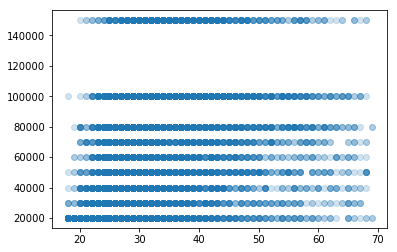

In [192]:
df_age = df_regression['age']
df_inc = df_regression['income']

plt.scatter(df_regression[['age']], df_regression[['income']], alpha=0.2)
plt.show()

In [203]:
df_regression.head(2)

,age,sex_mapping,body_mapping,income
1,35,1,1.0,80000
3,23,1,0.0,20000


In [210]:
#normalizing the data
x = df_regression.values
print(x)
print('-'*10)
min_max = preprocessing.MinMaxScaler()
print(min_max)
print('-'*10)
x_scaled = min_max.fit_transform(x)
print(x_scaled)
print('-'*10)

df_normalized = pd.DataFrame(x_scaled, columns=df_regression.columns)

[[  3.50000000e+01   1.00000000e+00   1.00000000e+00   8.00000000e+04]
 [  2.30000000e+01   1.00000000e+00   0.00000000e+00   2.00000000e+04]
 [  2.80000000e+01   1.00000000e+00   1.00000000e+00   4.00000000e+04]
 ..., 
 [  4.10000000e+01   1.00000000e+00   0.00000000e+00   7.00000000e+04]
 [  4.30000000e+01   0.00000000e+00   1.00000000e+00   8.00000000e+04]
 [  4.20000000e+01   1.00000000e+00   1.00000000e+00   1.00000000e+05]]
----------
MinMaxScaler(copy=True, feature_range=(0, 1))
----------
[[ 0.33333333  1.          1.          0.46153846]
 [ 0.09803922  1.          0.5         0.        ]
 [ 0.19607843  1.          1.          0.15384615]
 ..., 
 [ 0.45098039  1.          0.5         0.38461538]
 [ 0.49019608  0.          1.          0.46153846]
 [ 0.47058824  1.          1.          0.61538462]]
----------


In [211]:
print('-'*10)
print(df_normalized.head(2))

----------
        age  sex_mapping  body_mapping    income
0  0.333333          1.0           1.0  0.461538
1  0.098039          1.0           0.5  0.000000


In [216]:
x_val = df_normalized[['income', 'sex_mapping', 'body_mapping']]
y_val = df_normalized[['age']]

#split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, train_size = 0.8, test_size = 0.2, random_state = 60)

#create the Linear RegressionModel
linear_model = LinearRegression()

t0 = timeit.timeit()
print("Training Time: %f" %round(t0, 3) + " s")

#fitting the model to the data
linear_model.fit(x_train, y_train)

y_predict = linear_model.predict(x_test)

t1 = timeit.timeit()
print("Prediction time: %f" %round(t1, 3) + " s")

print('\n')
print(y_predict)
print('\n')

Training Time: 0.016000 s
Prediction time: 0.015000 s


[[ 0.27550206]
 [ 0.25383952]
 [ 0.25597119]
 ..., 
 [ 0.32189338]
 [ 0.28283163]
 [ 0.29777302]]




In [218]:
#Model coefficients - checking which variable carries more weight
print('Model coefficients: ', linear_model.coef_)

#Checking the models accuracy using R^2
print('Model Accuracy (R^2) : %f' % linear_model.score(x_test, y_test))

#calculating the MSE
#mse_calc = np.mean((y_val - linear_model.predict(x_val))**2)
#print(mse_calc)

#print('Mean Squared Error: ', mse_calc)
print('Mean Squared Error: %f' % mean_squared_error(y_val, linear_model.predict(x_val)))
#print(y_val)
#print(linear_model.predict(x_val))

('Model coefficients: ', array([[ 0.25390138, -0.04180183, -0.01465913]]))
Model Accuracy (R^2) : 0.124963
Mean Squared Error: 0.032033


We did a simple multiple linear regression using income, sex and body type to predict age.

<br> This regression does not work very well.

<br>From the above outputs we can see that the models R^2 is not very good, it is only 12.5%. 

<br>Using the coefficient values from the model we can also tell that: income impact income more than the body type and sex of the person. This is because the income coefficient is 0.2539 whereas the sex coefficient is -0.041 and the body type is -0.015.

# 5 - Regression Model 2 (KNN Regression)

In [219]:
#What is the best value for k?

scores_rmse = []

# We use a loop through the range 1 to 26
# We append the scores to scores_mse
for k in range(1,26):
    #print(k)
    knn = KNeighborsRegressor(n_neighbors=k)
    model = knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    scores_rmse.append(error)
    #print(error)

print(scores_rmse)

[0.22422666277309117, 0.2031636170412806, 0.19902634416250947, 0.19425586405503897, 0.19234832184043596, 0.1938122235307591, 0.19277723920358747, 0.19099296550713343, 0.1908102753103121, 0.18869011375682765, 0.1878615943463806, 0.18855104360001113, 0.18632501363047946, 0.18613026426994336, 0.18657080299323664, 0.18646875456728432, 0.1863241292118819, 0.18601095147849786, 0.18592126265565878, 0.18526726165438204, 0.1847694504525354, 0.18487983945300798, 0.18469836226226224, 0.18460873328415117, 0.18451149610172354]


In [225]:
#create the regressor
regressor = KNeighborsRegressor(n_neighbors = 14, weights = 'distance')


#fitting the model
regressor.fit(x_train, y_train)

t0 = timeit.timeit()
print("Training Time: %f" %round(t0, 3) + " s")

predictions = regressor.predict(x_test)
t1 = timeit.timeit()
print("Prediction time: %f" %round(t1, 3) + " s")
print('\n')

print(predictions, y_test.values)
print('\n')

#Checking the models accuracy using R^2
print('Model Accuracy (R^2) : %f' % regressor.score(x_test, y_test))

Training Time: 0.015000 s
Prediction time: 0.011000 s


(array([[ 0.29551821],
       [ 0.19887955],
       [ 0.25770308],
       ..., 
       [ 0.30112045],
       [ 0.28011204],
       [ 0.34593838]]), array([[ 0.03921569],
       [ 0.19607843],
       [ 0.09803922],
       ..., 
       [ 0.19607843],
       [ 0.09803922],
       [ 0.39215686]]))


Model Accuracy (R^2) : 0.130319


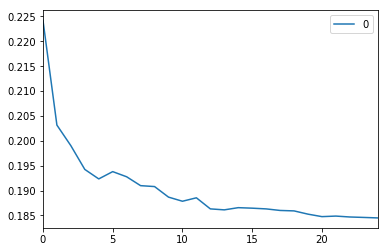

In [221]:
curve = pd.DataFrame(scores_rmse) #elbow curve 
curve.plot()

From above we are able to see that 14 as the number of neighbors is a good value. It is not the one with the lowest rmse but we are trying to find the balance between the number of neighbors and a low rmse. 

<br>The change of rmse between 12 neighbors and 20+ is very minimal and therefore we have chose 14 as the optimal number of neighbors.

# 6 - Classification Model 1 (KNN)

In [107]:
df_clean_classif = df_clean[['sex', 'diet', 'body_type', 'drinks', 'drugs', 'smokes']]
df_clean_classif.head(2)

,sex,diet,body_type,drinks,drugs,smokes
0,m,anything,unfit,socially,never,sometimes
1,m,other,fit,often,sometimes,no


In [108]:
df_classif_dummies = pd.get_dummies(df_clean_classif, columns=['sex', 'diet', 'drinks', 'drugs', 'smokes', 'body_type'])
df_classif_dummies.head(2)

,sex_f,sex_m,diet_anything,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,smokes_no,smokes_sometimes,smokes_yes,body_type_fit,body_type_unfit
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [109]:
#x_vals = df_classif_dummies.drop('body_type', axis = 1)
x_vals = df_classif_dummies.drop('sex_m', axis=1)
x_vals = x_vals.drop('sex_f', axis=1)

#x_vals.columns

#y_vals = df_classif_dummies['body_type']
y_vals = df_classif_dummies[['sex_m', 'sex_f']]

#y_vals.value_counts()

x_train_class, x_test_class, y_train_class, y_test_class =\
train_test_split(x_vals, y_vals, train_size = 0.8, test_size = 0.2,random_state = 60)

In [110]:
#finding the best k value for the model
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in range(1,26):3
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_class, y_train_class)
    y_pred_class = knn.predict(x_test_class)
    scores.append(metrics.accuracy_score(y_test_class, y_pred_class))

print(scores)

[0.56111817026683608, 0.45048708174502328, 0.56272765777213041, 0.40093180855569671, 0.60330368487928843, 0.47318932655654383, 0.602287166454892, 0.53197797543413805, 0.61956797966963151, 0.57348581109699281, 0.62304108428631932, 0.59491740787801783, 0.63583227445997459, 0.59517153748411689, 0.64032189750105883, 0.58788648877594241, 0.63896653960186367, 0.58026260059296908, 0.63862770012706482, 0.52469292672596357, 0.61050402371876322, 0.59678102498941121, 0.60974163490046596, 0.56094875052943671, 0.63964421855146125]


In [111]:
num_neighbors = np.arange(1,20)

train_accuracy = np.empty(len(num_neighbors))
test_accuracy = np.empty(len(num_neighbors))

for i,k in enumerate(num_neighbors):
    #create the classifier
    knn_class = KNeighborsClassifier(n_neighbors=k)
    
    #fit the model 
    knn_class.fit(x_train_class, y_train_class)
    
    #accuracy of training
    train_accuracy[i] = knn_class.score(x_train_class, y_train_class)
    
    #accuracy of test
    test_accuracy[i] = knn_class.score(x_test_class, y_test_class)

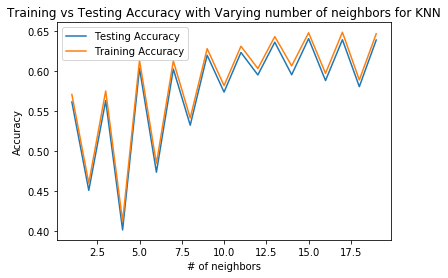

In [112]:
#plotting the training vs testing accuracy based on the number of neighbors for KNN
plt.plot(num_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(num_neighbors, train_accuracy, label = 'Training Accuracy')

plt.title('Training vs Testing Accuracy with Varying number of neighbors for KNN')
plt.xlabel('# of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

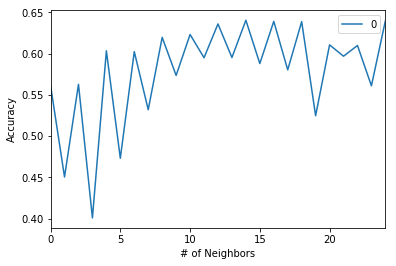

In [113]:
curve2 = pd.DataFrame(scores) #elbow curve 
curve2.plot()
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy')
plt.show()

From the above plot we are able to see that the optimal number of neighbors keeps increasing the more neighbors. We want to ensure that the trade of between accuracy and # of neighbors "works". 
<br> At around 5 neighbors we have an **accuracy of 0.60330368487928843**. This accuracy does increase slightly with more neighbors but because we need to find the balance between the number of neighbors and accuracy, we will say 5 is the optimal number of neighbors. 

In [140]:
#Creating the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)


#fitting the model
knn_model.fit(x_train_class, y_train_class)

t0 = timeit.timeit()
print("Training Time: %f" %round(t0, 3) + " s")

#classifying points
y_predict = knn_model.predict(x_test_class)
t1 = timeit.timeit()
print("Prediction time: %f" %round(t1, 3) + " s")

y_predict

Training Time: 0.010000 s
Prediction time: 0.011000 s


array([[ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [116]:
#getting the accuracy of the knn model
print('Model Accuracy: %f' %knn_model.score(x_test_class, y_test_class))



#can i still use the crosstab if i start using the dummy variables for sex??
#using crosstab to see the predictions
pd.crosstab(y_test_class['sex_f'], y_predict[0][0], rownames=['True'], colnames=['Predicted'], margins=True)

Model Accuracy: 0.603304


Predicted,0.0,All
True,,
0.0,7151,7151
1.0,4654,4654
All,11805,11805


In [117]:
#printing metrics: precision, recall and f1-score
print(classification_report(y_test_class,y_predict))

             precision    recall  f1-score   support

          0       0.64      0.77      0.70      7151
          1       0.50      0.34      0.41      4654

avg / total       0.59      0.60      0.59     11805



From the above tables we are able to see that the model has mispredicted 4,654 cases. The cases were supposed to be 1 (or Males) but the model has predicted them to be 0 (or Females).
<br>The model accuracy has been calculated at 0.603304

# 7 - Classification (SVM)

In [119]:
df_clean_classif = df_clean[['sex','diet', 'body_type', 'drinks', 'drugs', 'smokes']]
df_clean_classif.head(2)


df_dummies = pd.get_dummies(df_clean_classif, columns=['diet', 'drinks', 'drugs', 'smokes', 'body_type'])
#df_dummies = df_clean_classif.dummmies([['diet', 'body_type', 'drinks', 'drugs', 'smokes']])
df_dummies.head(2)

,sex,diet_anything,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,smokes_no,smokes_sometimes,smokes_yes,body_type_fit,body_type_unfit
0,m,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,m,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [120]:
x_vals_svc = df_dummies.drop('sex', axis=1)
x_vals_svc

y_vals_svc = df_dummies['sex']
y_vals_svc


x_train_svc, x_test_svc, y_train_svc, y_test_svc = \
train_test_split(x_vals_svc, y_vals_svc, train_size = 0.8, test_size = 0.2,random_state = 60)

In [139]:
#recall the variables used above x_train_class, x_test_class, y_train_class, y_test_class

#create SVC classifier
svc_classif = SVC(random_state=60) #using the default rbf with no parameters we have a classifiction accuracy of 0.7069
#gamma = 0.05 --> accuracy is 0.706957
#svc_classif = SVC(kernel = 'rbf', gamma = 0.05)

#train the model
svc_classif.fit(x_train_svc, y_train_svc)
t0 = timeit.timeit()
print("Training Time: %f" %round(t0, 3) + " s")


y_predict_svc = svc_classif.predict(x_test_svc)
t1 = timeit.timeit()
print("Prediction time: %f" %round(t1, 3) + " s")

print('\n')
print(y_predict_svc)

Training Time: 0.011000 s
Prediction time: 0.011000 s


['f' 'm' 'm' ..., 'f' 'f' 'm']


In [122]:
#checking the classifiers accuracy
svc_classif.score(x_test_svc, y_test_svc)

0.64938585345192712

In [228]:
print(classification_report(y_test_svc,y_predict_svc))

             precision    recall  f1-score   support

          f       0.57      0.46      0.51      4654
          m       0.69      0.77      0.73      7151

avg / total       0.64      0.65      0.64     11805



# Conclusions

Most of the data from the dataset is text. There are only 3 columns that are numerical: age, height, income.

There are 59,946 entries.
2 columns have 40% or more of the entries missing: 
-  59% of the offspring entries are missing.
-  41% of the diet entries are missing.

48,442 (or ~ 81%) of the data contains -1 as the amount. This most likely indicate that people did not want to share their income and have left the entry either blank or enetered -1 as the value.

There are heights that appear to be less than 5 feet (60 inches) and over 6.6 feet (80 inches). We will set the criteria to only include people whose height are between 60 inches and 80 inches.
Using this criteria 413 rows will be removed.

Quick summary of the most entered values:

The average female is around 25 years old, with average body type, graduated from university/college, a height of 64 inches (~5.3 feet),  did not report her income, has a job title of "other", of white ethnicity, with no kids, straight, doesn't smoke, single and speaks english.

The average males is around 26 years old, with an athletic body type, graduated from university/college, has a height of 70 inches (~5.8 feet), did not report his income, has a job title of "computer / hardware / software", of white ethnicity, with no kids, straight and speaks english.

24,117 (or 40%) of the profiles belong to females.

Males make about 28% more than the females based on the self reported income, and excluding values of -1 and of 1 million.

2 profiles indicate that they are 109 and 110 years old.

From the plots we can see that most (30,017 or ~50%) of the profiles indicate an age between 21 and 30.
There are about 3,584 people over 50 years old

1,683 people indicated that they have some sort of education or work in space camp
